# Model for Forecasting Solar Radiation  

## Group: 33 Members

### 2020BELE024 - Dhruv Sharma  
### 2020BELE077 - Anurudra Yadav
### 2020BELE099 - kausinder


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

## Reading the dataset

In [2]:
df = pd.read_csv("Data_solar_Radiation.csv")
display(df)

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


## Cleaning the dataset

In [3]:
df = df.drop(['UNIXTime'], axis=1)

In [4]:
def func_date(data):
  
    data = data.split()
    data = data[0]
    data = data.split('/') 

    day = int(data[1])
    month = int(data[0])
    year = int(data[2])

    date1 = date(year-1, 12, 31)
    date2 = date(year, month, day)
    diff = date2 - date1
    diff = str(diff)
    diff = diff.split(' ')

    return int(diff[0])

def func_time(data):
    data = data.split(':')
    time = int(data[0])*3600 + int(data[1])*60 + int(data[2])
    return time

In [5]:
df['Date'] = df['Date'].apply(func_date) 
df['Time'] = df['Time'].apply(func_time) 
df['TimeSunRise'] = df['TimeSunRise'].apply(func_time) 
df['TimeSunSet'] = df['TimeSunSet'].apply(func_time) 
display(df)

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,273,86126,1.21,48,30.46,59,177.39,5.62,22380,65580
1,273,85823,1.21,48,30.46,58,176.78,3.37,22380,65580
2,273,85526,1.23,48,30.46,57,158.75,3.37,22380,65580
3,273,85221,1.21,48,30.46,60,137.71,3.37,22380,65580
4,273,84924,1.17,48,30.46,62,104.95,5.62,22380,65580
...,...,...,...,...,...,...,...,...,...,...
32681,336,1204,1.22,44,30.43,102,145.42,6.75,24060,63720
32682,336,901,1.17,44,30.42,102,117.78,6.75,24060,63720
32683,336,601,1.20,44,30.42,102,145.19,9.00,24060,63720
32684,336,302,1.23,44,30.42,101,164.19,7.87,24060,63720


## Summarizing the dataset

In [6]:
df.describe()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,306.110965,43277.574068,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,23258.431133,64691.463624
std,34.781367,24900.749819,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,931.122823,995.053346
min,245.000000,1.000000,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,22020.000000,63720.000000
25%,277.000000,21617.000000,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,22440.000000,63900.000000
50%,306.000000,43230.000000,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,23040.000000,64260.000000
75%,334.000000,64849.000000,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,24000.000000,65340.000000
max,366.000000,86185.000000,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,25020.000000,67080.000000


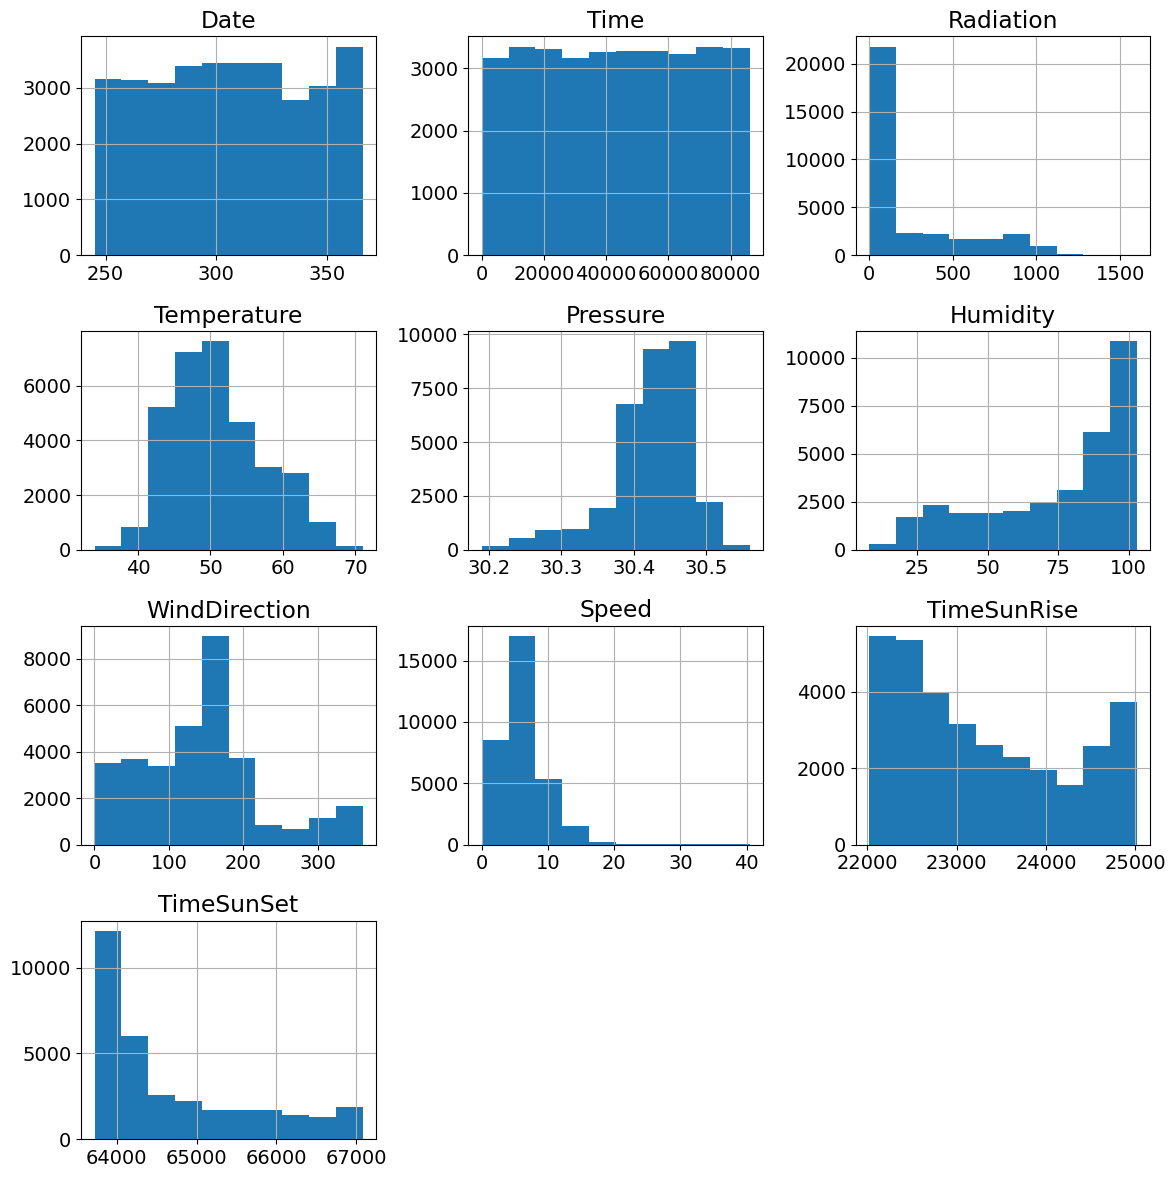

In [7]:
plt.rcParams["font.size"] = 14
df.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

## Feature Selection

### Correlation Matrix

In [8]:
display(df.corr(method='pearson'))

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
Date,1.000000,-0.007094,-0.081320,-0.370794,-0.332762,-0.063760,0.153255,0.174336,0.981939,-0.847401
Time,-0.007094,1.000000,0.004348,0.197227,0.091066,0.077851,-0.077956,-0.057908,-0.006639,0.008038
Radiation,-0.081320,0.004348,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.092850,0.045688
Temperature,-0.370794,0.197227,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.380968,0.285131
Pressure,-0.332762,0.091066,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.380399,0.146884
Humidity,-0.063760,0.077851,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.023955,0.135243
WindDirection,0.153255,-0.077956,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.176929,-0.068040
Speed,0.174336,-0.057908,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.167075,-0.159400
TimeSunRise,0.981939,-0.006639,-0.092850,-0.380968,-0.380399,-0.023955,0.176929,0.167075,1.000000,-0.738271
TimeSunSet,-0.847401,0.008038,0.045688,0.285131,0.146884,0.135243,-0.068040,-0.159400,-0.738271,1.000000


### Correlation Heatmap

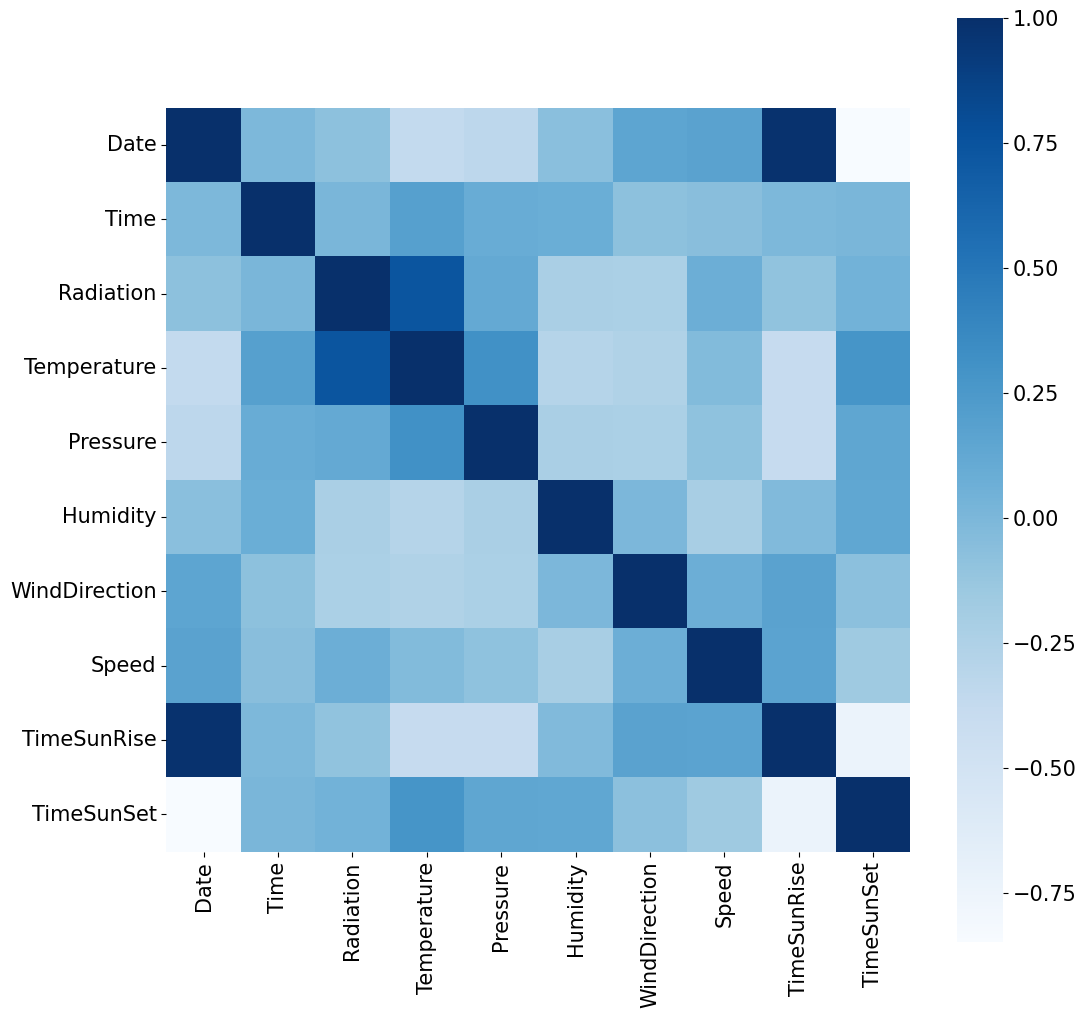

In [9]:
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["font.size"] = 15

sns.heatmap(df.corr(), square=True, cmap='Blues')
plt.show()

### Scatter Plot

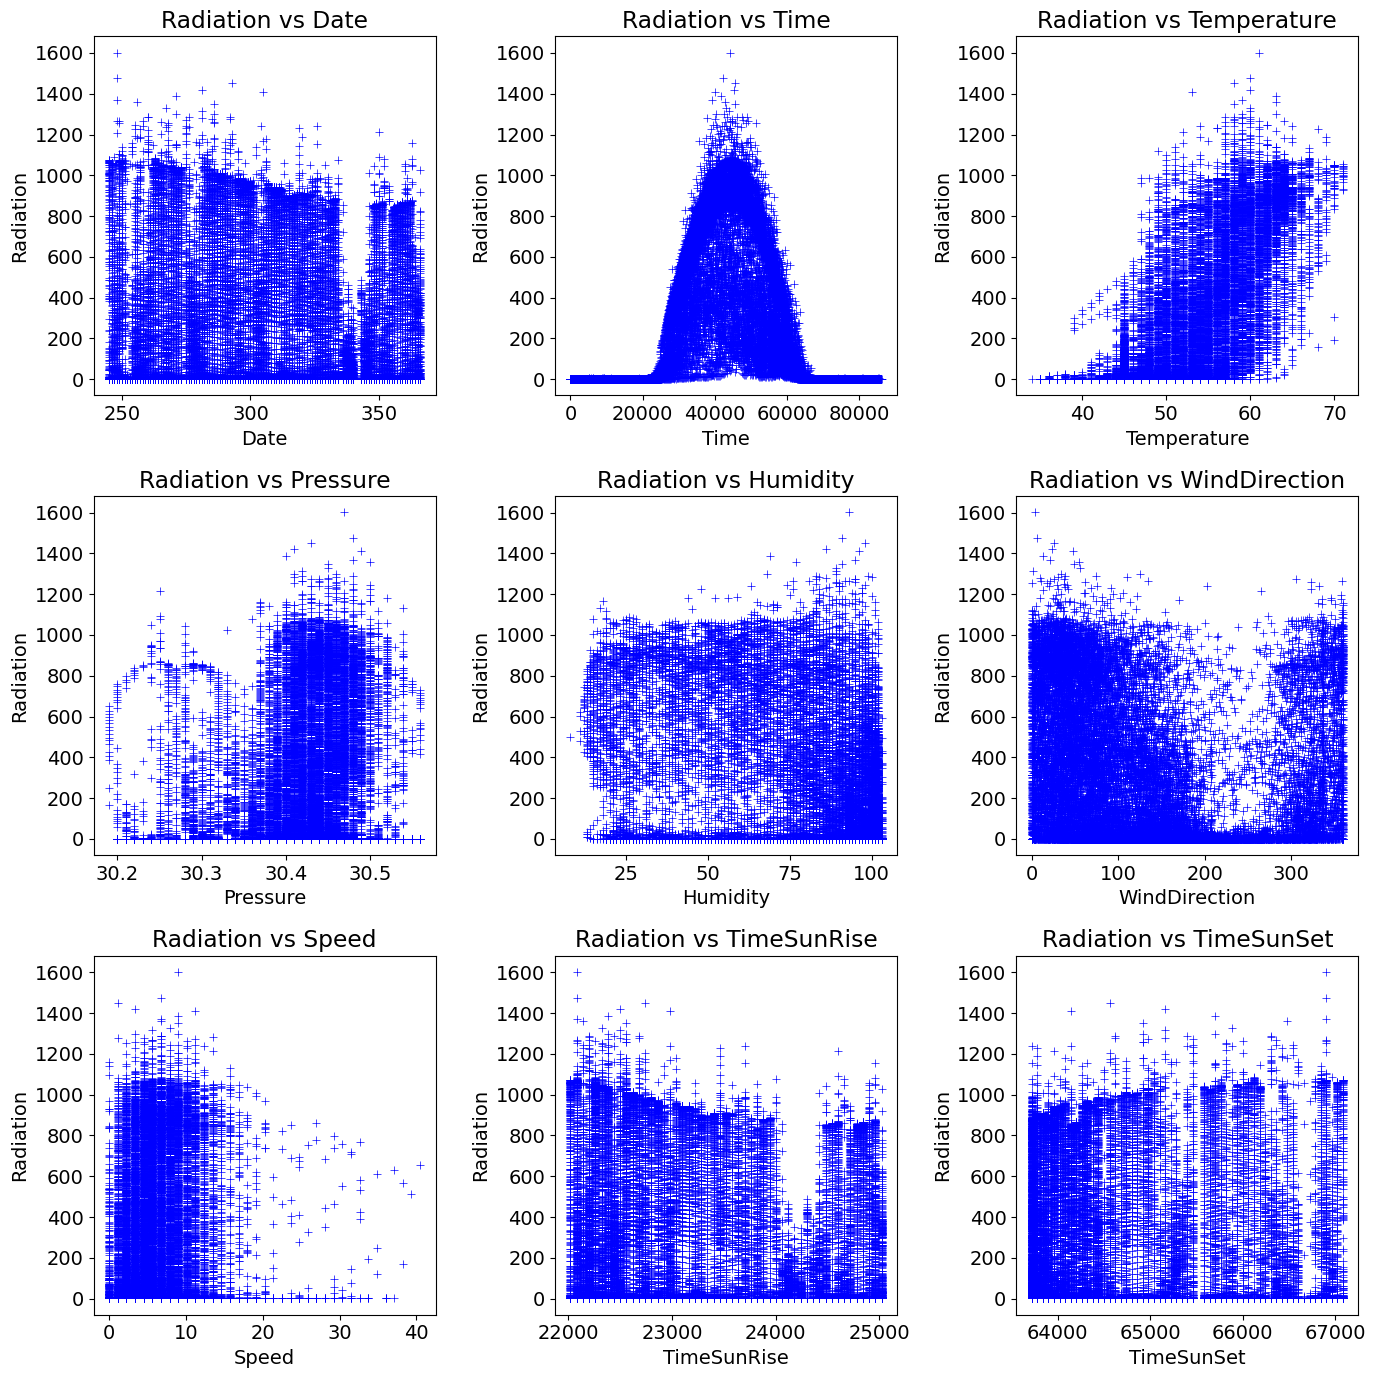

In [10]:
plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 14

ylabel = 'Radiation'
columns = ['Date', 'Time', 'Temperature',	'Pressure',	'Humidity',	'WindDirection',	'Speed',	'TimeSunRise',	'TimeSunSet']

for index, xlabel in enumerate(columns):
  plt.subplot(3, 3, index+1)
  plt.scatter(df[xlabel], df[ylabel],color='blue',marker='+',linewidth=0.5)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(ylabel + ' vs ' + xlabel)

plt.tight_layout()

### Hourly Average Plots

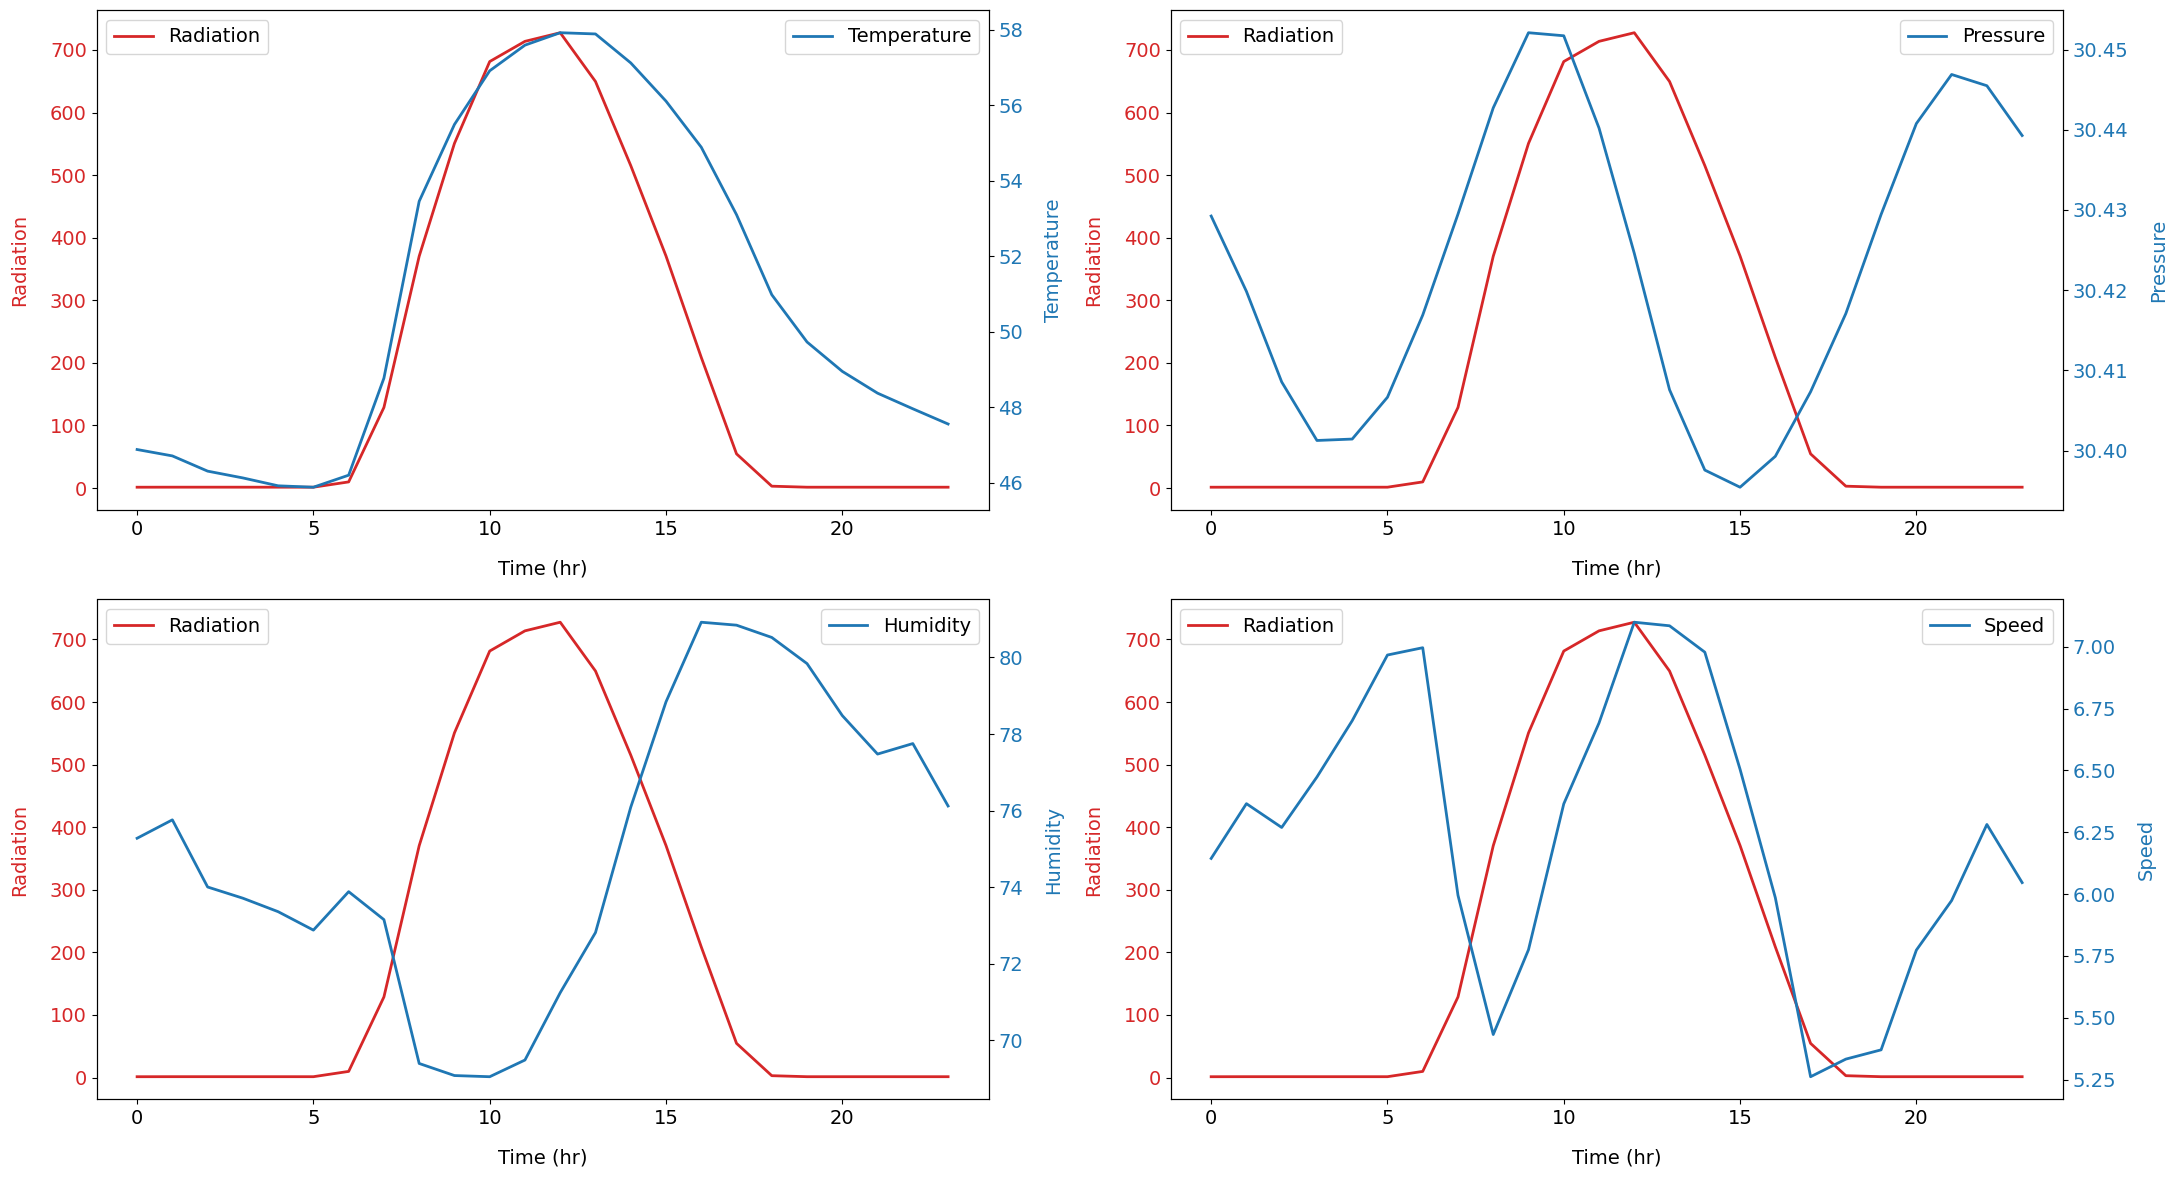

In [11]:
plt.rcParams["figure.figsize"] = (22, 12)

columns = ['Temperature',	'Pressure',	'Humidity',	'Speed']

hourlyY1 = defaultdict(list)
for index, row in df.iterrows():
  hourlyY1[row['Time']//3600].append(row['Radiation'])

hour = list(hourlyY1.keys())
Y1 = []
for hr in hour:
  Y1.append(sum(hourlyY1[hr])/len(hourlyY1[hr]))

for ind, ylabel in enumerate(columns):

  hourlyY2 = defaultdict(list)
  for index, row in df.iterrows():
    hourlyY2[row['Time']//3600].append(row[ylabel])

  hour = list(hourlyY2.keys())
  Y2 = []
  for hr in hour:
    Y2.append(sum(hourlyY2[hr])/len(hourlyY2[hr]))

  ax1 = plt.subplot(2, 2, ind+1)

  color = 'tab:red'
  ax1.set_xlabel('Time (hr)', labelpad=15)
  ax1.set_ylabel('Radiation', color=color, labelpad=15)
  ax1.plot(hour, Y1, color=color, linewidth=2, label='Radiation')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel(ylabel, color=color, labelpad=15)
  ax2.plot(hour, Y2, color=color, linewidth=2, label=ylabel)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

plt.tight_layout()

In [12]:
df.drop(['TimeSunRise',	'TimeSunSet'], axis=1, inplace=True)

## Training and testing the models

In [13]:
!pip install xgboost==1.5.0

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Train-Test split

In [15]:
Y = df['Radiation'].values
df.drop(['Radiation'], axis=1, inplace=True)

X = df.values


In [16]:
RS=1811
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=RS)

In [17]:
X_train_data = pd.DataFrame(X_train)
X_test_data = pd.DataFrame(X_test)
Y_train_data = pd.DataFrame(Y_train)
Y_test_data = pd.DataFrame(Y_test)


In [18]:
print('X_train : ')
print(X_train_data.head())
 
print('')
print('X_test : ')
print(X_test_data.head())
 
print('')
print('y_train : ')
print(Y_train_data.head())
 
print('')
print('y_test : ')
print(Y_test_data.head())

X_train : 
       0        1     2      3      4       5     6
0  355.0  30618.0  53.0  30.54   68.0  143.90  4.50
1  308.0  62118.0  60.0  30.42   59.0   41.32  4.50
2  329.0  20102.0  42.0  30.45   65.0  166.24  7.87
3  321.0  10801.0  48.0  30.44   24.0  181.08  7.87
4  253.0  10224.0  44.0  30.37  100.0  140.21  5.62

X_test : 
       0        1     2      3      4       5      6
0  302.0  45920.0  50.0  30.40  101.0   69.67   4.50
1  350.0  73517.0  46.0  30.26  103.0  326.67   5.62
2  323.0  27019.0  47.0  30.44   65.0  145.42   5.62
3  350.0  24002.0  38.0  30.25   95.0  239.63  14.62
4  280.0  77120.0  50.0  30.46  102.0  128.94   3.37

y_train : 
        0
0  402.98
1   60.14
2    1.19
3    1.18
4    1.64

y_test : 
        0
0  516.10
1    1.24
2   21.79
3    3.27
4    1.22


## Predictions using standard models

### Linear Regression

In [20]:
lr=LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [21]:
pred=lr.predict(X_test)

m=lr.coef_
m


array([ 1.98104301e+00, -2.07962649e-03,  4.38422669e+01, -3.59256338e+02,
        5.47659755e-01, -2.74759504e-01,  5.44636736e+00])

In [22]:
c=lr.intercept_
c

8343.38181353302

In [23]:
pred_df = pd.DataFrame(pred)
pred_df.head()

,0
0,177.560819
1,26.768309
2,78.143836
3,-148.853461
4,25.646415


In [24]:
print("Accuracy for Test data sets")
print( lr.score(X_test, Y_test)*100,'%')

Accuracy for Test data sets
62.59189940799948 %


### Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=RS)
dtr.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=1811)

In [26]:
predict_dtr=dtr.predict(X_test)
pred_dtr = pd.DataFrame(predict_dtr)
pred_dtr.head()

,0
0,649.12
1,1.22
2,22.09
3,1.71
4,1.25


In [27]:
print("Accuracy for Test data sets")
print('train', dtr.score(X_test, Y_test))

Accuracy for Test data sets
train 0.8748831378034979


In [28]:
pred_dtr=dtr.predict(X_test)
pred,pred_dtr

(array([177.56081898,  26.76830946,  78.1438362 , ...,  20.46184907,
        179.0410039 , 570.2269207 ]),
 array([ 649.12,    1.22,   22.09, ...,    1.21,    4.5 , 1026.57]))

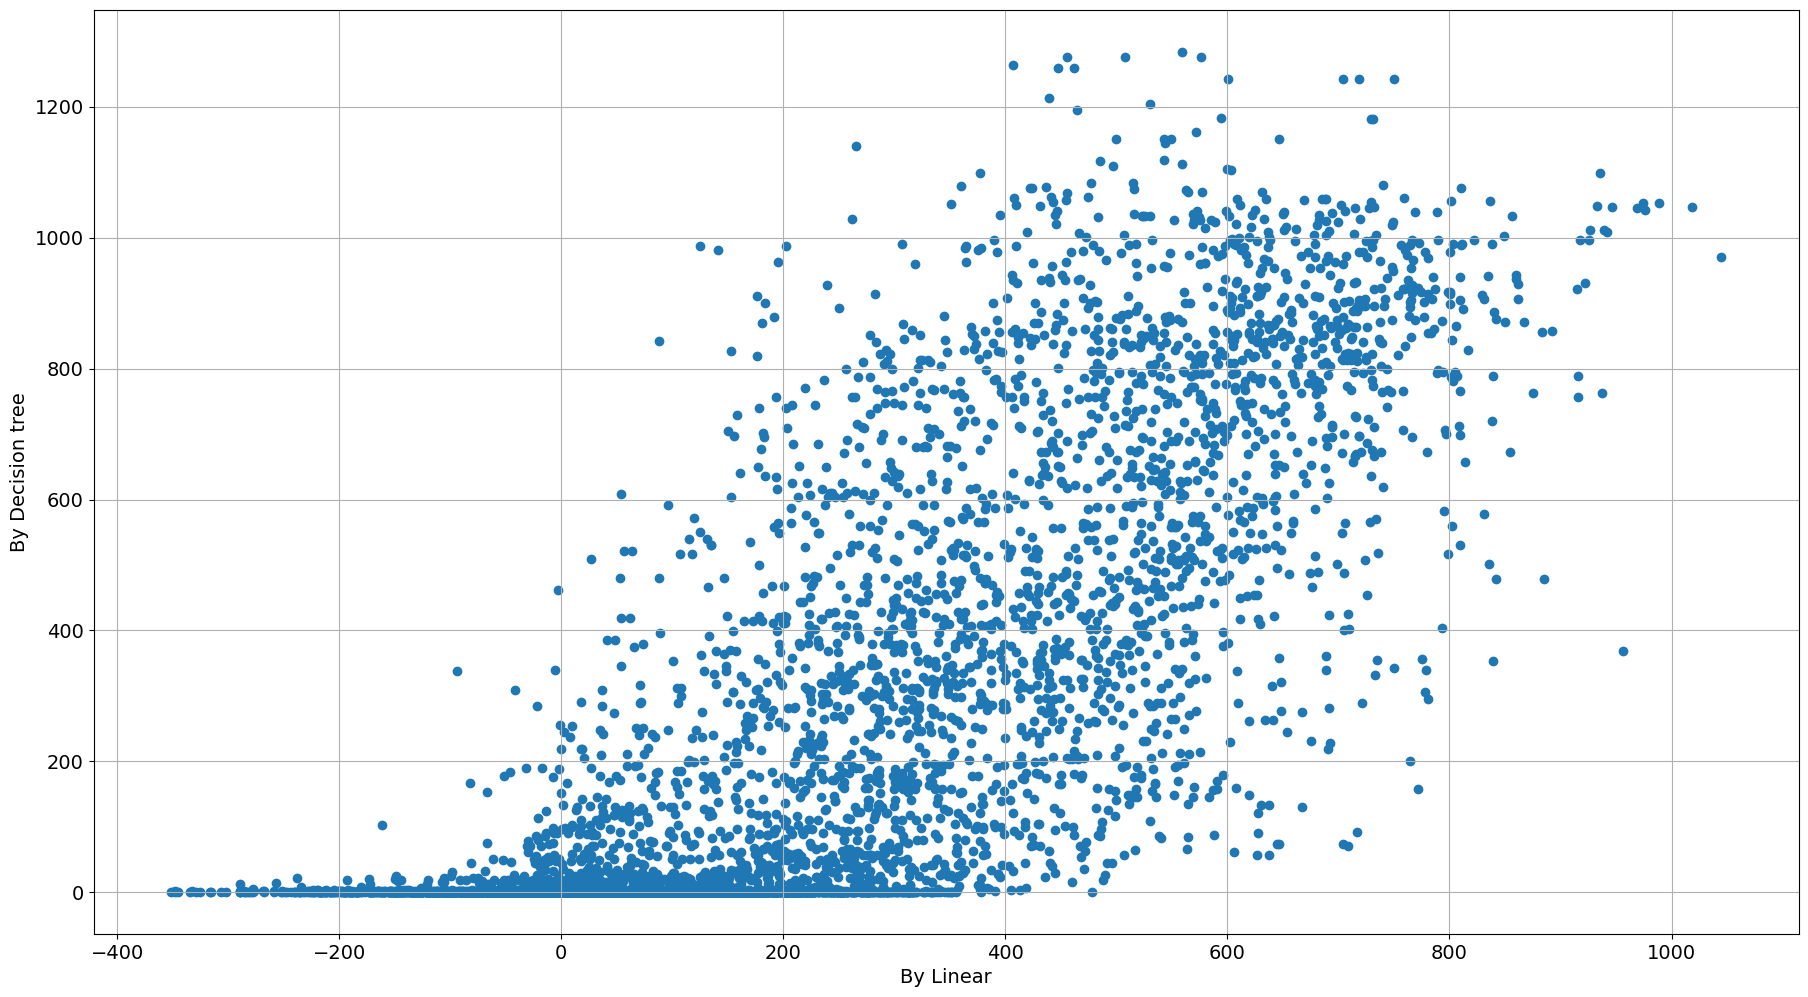

In [29]:
plt.scatter(pred,pred_dtr);
plt.xlabel('By Linear');
plt.ylabel('By Decision tree');
plt.grid()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [32]:
predict_rfr=rfr.predict(X_test)
pred_rfr = pd.DataFrame(predict_rfr)
pred_rfr.head()

,0
0,628.5556
1,1.2405
2,23.5414
3,2.6356
4,1.2316


In [33]:
print('test', rfr.score(X_test, Y_test))

test 0.9374048580618037


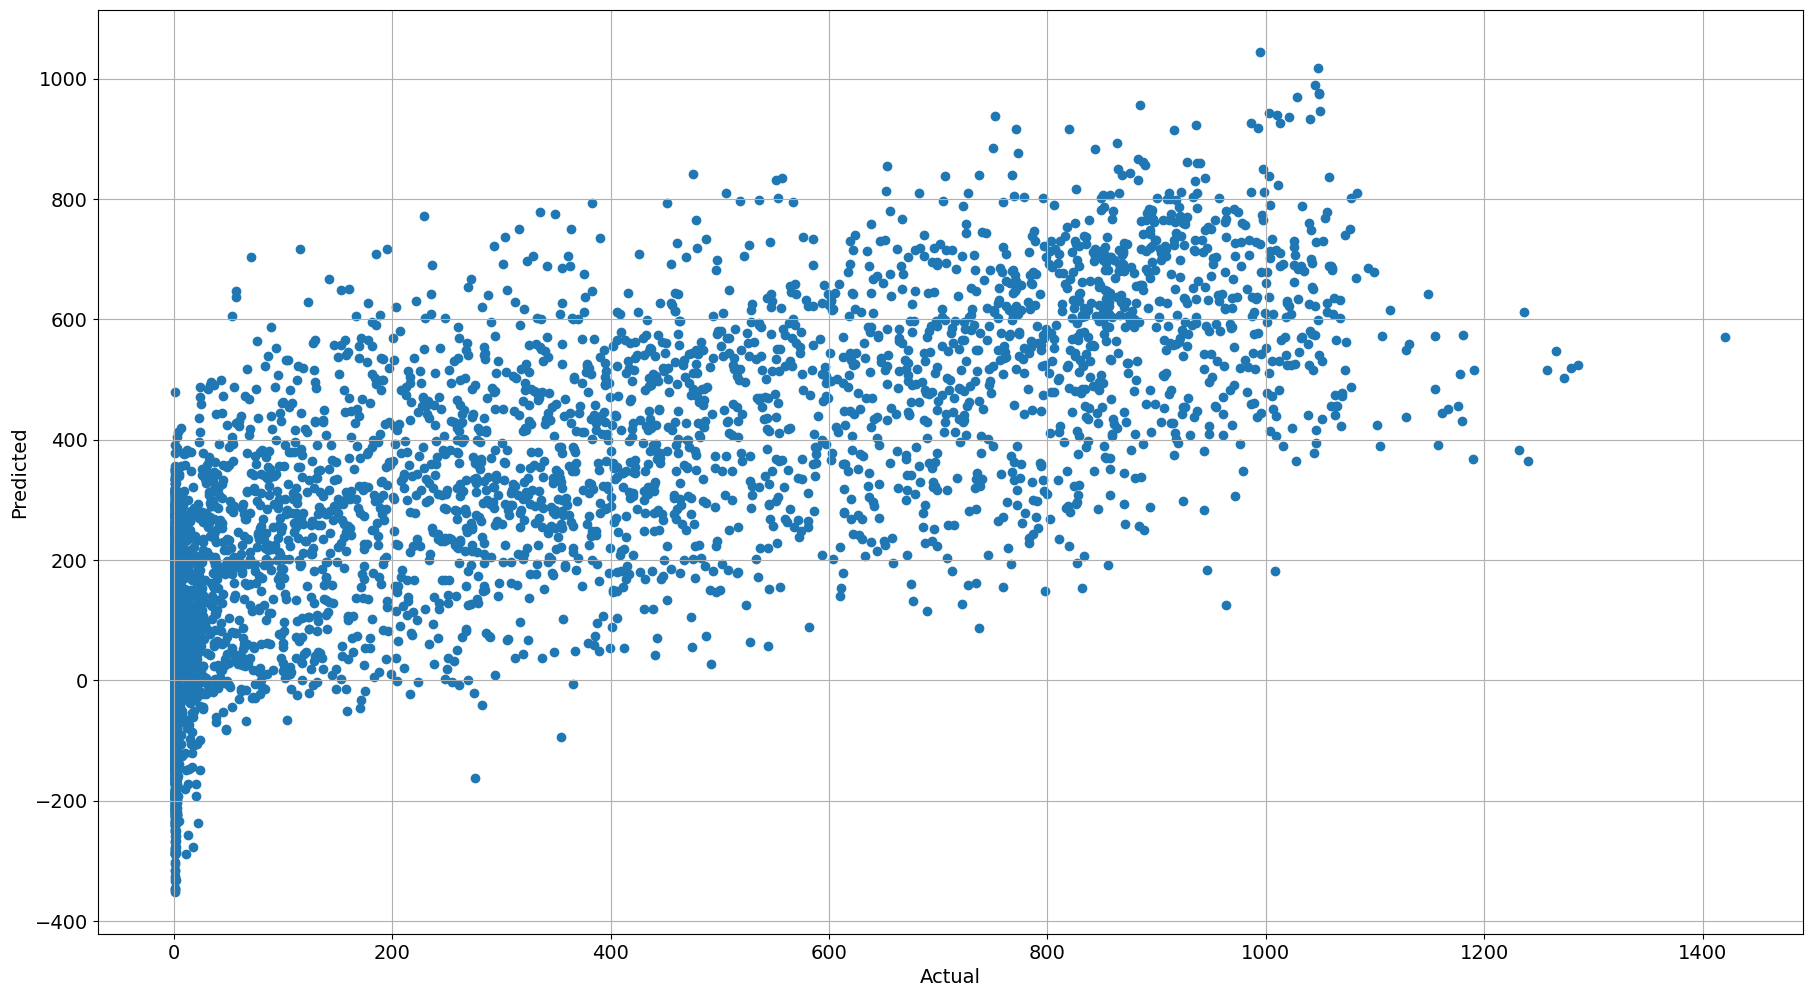

In [34]:
plt.scatter(Y_test,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.grid()

# The End